**Import relevant libraries**

In [1]:
import json
import re
import pandas as pd
from mplsoccer import Pitch, VerticalPitch
from adjustText import adjust_text
from highlight_text import ax_text
import matplotlib.pyplot as plt

from mplsoccer import Pitch, VerticalPitch
from adjustText import adjust_text
from highlight_text import ax_text
import matplotlib.pyplot as plt
from highlight_text import fig_text

**Download the file in your local computer and follow the instruction in 
https://www.dzialowski.eu/football-data-visualisations/**

In [2]:
def extract_json_from_html(html_path, save_output=False):
    html_file = open(html_path, 'r')
    html = html_file.read()
    html_file.close()
    regex_pattern = r'(?<=require\.config\.params\["args"\].=.)[\s\S]*?;'
    data_txt = re.findall(regex_pattern, html)[0]

    # add quotations for json parser
    data_txt = data_txt.replace('matchId', '"matchId"')
    data_txt = data_txt.replace('matchCentreData', '"matchCentreData"')
    data_txt = data_txt.replace('matchCentreEventTypeJson', '"matchCentreEventTypeJson"')
    data_txt = data_txt.replace('formationIdNameMappings', '"formationIdNameMappings"')
    data_txt = data_txt.replace('};', '}')

    if save_output:
        # save json data to txt
        output_file = open(f"{html_path}.txt", "wt")
        n = output_file.write(data_txt)
        output_file.close()

    return data_txt




def extract_data_from_dict(data):
    # load data from json
    event_types_json = data["matchCentreEventTypeJson"]
    formation_mappings = data["formationIdNameMappings"]
    events_dict = data["matchCentreData"]["events"]
    teams_dict = {data["matchCentreData"]['home']['teamId']: data["matchCentreData"]['home']['name'],
                  data["matchCentreData"]['away']['teamId']: data["matchCentreData"]['away']['name']}
    players_dict = data["matchCentreData"]["playerIdNameDictionary"]
    # create players dataframe
    players_home_df = pd.DataFrame(data["matchCentreData"]['home']['players'])
    players_home_df["teamId"] = data["matchCentreData"]['home']['teamId']
    players_away_df = pd.DataFrame(data["matchCentreData"]['away']['players'])
    players_away_df["teamId"] = data["matchCentreData"]['away']['teamId']
    players_df = pd.concat([players_home_df, players_away_df])
    players_ids = data["matchCentreData"]["playerIdNameDictionary"]
    return events_dict, players_df, teams_dict



match_html_path = '/Users/aritramajumdar/Downloads/Whoscored/Worldcup/Worldcup_groupstage/Spain 1-1 Germany - FIFA World Cup 2022 Live.html'


json_data_txt = extract_json_from_html(match_html_path)
data = json.loads(json_data_txt)
events_dict, players_df, teams_dict = extract_data_from_dict(data)
df_events = pd.DataFrame(events_dict)


a = []
for key, value in teams_dict.items():
    temp = [key,value]
    a.append(temp)
    
    
df_events['eventType'] = df_events.apply(lambda row: row['type']['displayName'], axis=1)
df_events['outcomeType'] = df_events.apply(lambda row: row['outcomeType']['displayName'], axis=1)
df_events["receiver"] = df_events["playerId"].shift(-1)



**Extract the shot body part name**

In [3]:
items = []

new_df = pd.DataFrame()

for i in range(0, len(df_events)):
    list_of_all_values5 = [value for elem in df_events['qualifiers'][i] for value in elem.values()]
    try:
        if {'value': 20, 'displayName': 'RightFoot'} in list_of_all_values5:
            items.append("Right Foot") 
        elif {'value': 72, 'displayName': 'LeftFoot'} in list_of_all_values5:
            items.append("Left Foot")
        elif {'value': 15, 'displayName': 'Head'} in list_of_all_values5:
            items.append("Head")
        elif {'value': 21, 'displayName': 'OtherBodyPart'} in list_of_all_values5:
            items.append("Other")
            
        else:
            items.append(0)
         
    except:
        items.append(0)

        
new_df['shot_body_part_name'] = items
frames = [df_events, new_df]
data = pd.concat(frames, axis = 1)

**Extract the shot type name**

In [4]:
items1 = []

new_df1 = pd.DataFrame()

for i in range(0, len(df_events)):
    list_of_all_values5 = [value for elem in df_events['qualifiers'][i] for value in elem.values()]
    try:
        if {'value': 22, 'displayName': 'RegularPlay'} in list_of_all_values5:
            items1.append("Regular_Play") 
        elif {'value': 23, 'displayName': 'FastBreak'} in list_of_all_values5:
            items1.append("Fast_Break")
        elif {'value': 24, 'displayName': 'SetPiece'} in list_of_all_values5:
            items1.append("Set_Piece")
        elif {'value': 25, 'displayName': 'FromCorner'} in list_of_all_values5:
            items1.append("From_Corner")
        elif {'value': 26, 'displayName': 'FreeKick'} in list_of_all_values5:
            items1.append("Free_Kick")
        elif {'value': 26, 'displayName': 'DirectFreekick'} in list_of_all_values5:
            items1.append("Direct_Free_Kick")
        elif {'value': 9, 'displayName': 'Penalty'} in list_of_all_values5:
            items1.append("Penalty")
            
        else:
            items1.append(0)
         
    except:
        items1.append(0)

new_df1['shot_type_name'] = items1
frames = [data, new_df1]
data1 = pd.concat(frames, axis = 1)

**Extract the shot technique name**

In [5]:
items2 = []

new_df2 = pd.DataFrame()

for i in range(0, len(df_events)):
    list_of_all_values5 = [value for elem in df_events['qualifiers'][i] for value in elem.values()]
    try:
        if {'value': 108, 'displayName': 'Volley'} in list_of_all_values5:
            items2.append("Volley") 
        elif {'value': 109, 'displayName': 'Overhead'} in list_of_all_values5:
            items2.append("Overhead Kick")
        elif {'value': 110, 'displayName': 'HalfVolley'} in list_of_all_values5:
            items2.append("Half Volley")
        elif {'value': 111, 'displayName': 'DivingHeader'} in list_of_all_values5:
            items2.append("Diving Header")
        elif {'value': 117, 'displayName': 'Lob'} in list_of_all_values5:
            items2.append("Lob")
        elif {'value': 262, 'displayName': 'BackHeel'} in list_of_all_values5:
            items2.append("Backheel")
            
        else:
            items2.append("Normal")
         
    except:
        items2.append(0)

new_df2['shot_technique_name'] = items2
frames = [data1, new_df2]
data2 = pd.concat(frames, axis = 1)

**Some feature engineering such as selecting only the shots, mapping team names, extracting the last name**

In [6]:
shots = data2.loc[data2['isShot'] == True]
shots['teamId'] = shots['teamId'].map({a[0][0]: a[0][1], a[1][0]: a[1][1]})
shots['playerId'] = shots['playerId'].astype(int)
check_players = players_df[['playerId', 'name']]
shots_data = pd.merge(shots, check_players, on = "playerId")
shots_data['last_name'] = shots_data.name.str.split(' ').str[-1]

/Users/aritramajumdar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/aritramajumdar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


**Selecting the relevant columns**

In [7]:
shots_data = shots_data[['minute', 'second', 'teamId', 'last_name', 'x', 'y', 'shot_technique_name',
        'shot_body_part_name', 'shot_type_name', 'blockedX', 'blockedY', 'goalMouthY', 'isGoal']]

**Remember StatsBomb has co-ordinate system of (120, 80) and OPTA has (100, 100), 
Our xG model is based on the StatsBomb (120, 80) co-ordinate system, as a result we have to convert the OPTA (100, 100)
into (120, 80**)

In [8]:
shots_data['isGoal'] = shots_data['isGoal'].map({True: 'goal'})
shots_data['isGoal'] = shots_data['isGoal'].fillna("No_goal")
shots_data = shots_data.rename(columns={'x':'location_x'})
shots_data = shots_data.rename(columns={'y':'location_y'})
shots_data['blockedY'].fillna(shots_data['goalMouthY'], inplace=True)
shots_data = shots_data.rename(columns={'blockedX':'shot_end_location_x'})
shots_data = shots_data.rename(columns={'blockedY':'shot_end_location_y'})
shots_data['shot_end_location_x'] = shots_data['shot_end_location_x'].fillna(100.0)

shots_data['location_x'] = (shots_data['location_x']/100)*120
shots_data['location_y'] = (shots_data['location_y']/100)*80

shots_data['shot_end_location_x'] = (shots_data['shot_end_location_x']/100)*120
shots_data['shot_end_location_y'] = (shots_data['shot_end_location_y']/100)*80

**Calculating Shot distance and shot angle**

In [9]:
import numpy as np
shots_data['shot_distance']=round(np.sqrt((shots_data['shot_end_location_x']-shots_data['location_x'])**2+(shots_data['shot_end_location_y']-shots_data['location_y'])**2),1)
shots_data['shot_a'] = np.sqrt((shots_data['location_x']-120)**2+(shots_data['location_y']-36)**2)
shots_data['shot_b']=np.sqrt((shots_data['location_x']-120)**2+(shots_data['location_y']-44)**2)

shots_data['shot_a'] = shots_data['shot_a'].round(2)
shots_data['shot_b'] = shots_data['shot_b'].round(2)


shots_data['shot_angle']=np.arccos((shots_data['shot_a']**2+shots_data['shot_b']**2-64)/(2*shots_data['shot_a']*shots_data['shot_b']))#calculating angle using cosine rule
shots_data['shot_angle']=np.degrees(shots_data['shot_angle'])
shots_data['shot_angle']=round(shots_data['shot_angle'],2)

**Encoding the category columns**

In [10]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

shots_data['shot_technique_name'] = labelencoder.fit_transform(shots_data['shot_technique_name'])
shots_data['shot_body_part_name'] = labelencoder.fit_transform(shots_data['shot_body_part_name'])

**Load the model**

In [11]:
from joblib import Parallel, delayed
import joblib

xg_model = joblib.load('statsbomb_all_xg_model_openplay.pkl')

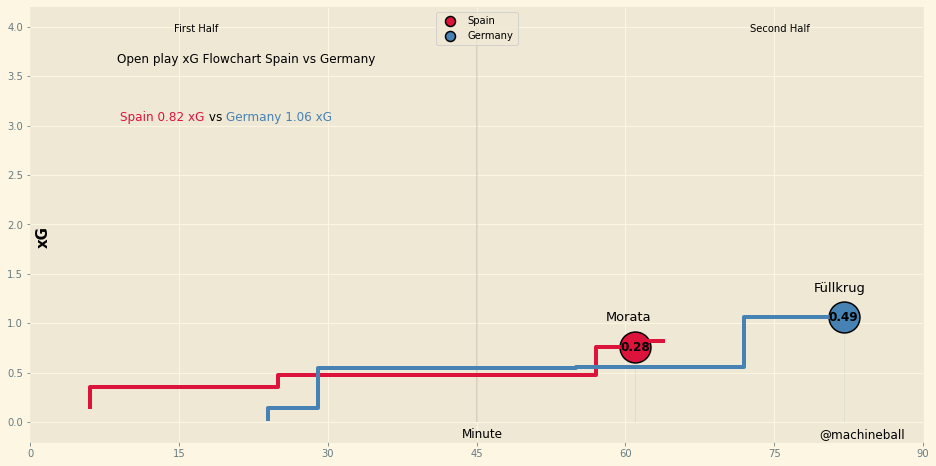

In [12]:
X_test = shots_data[['shot_technique_name',
        'shot_body_part_name', 'location_x', 'location_y',
        'shot_distance', 'shot_a', 'shot_b',
       'shot_angle']]

y_pred = xg_model.predict_proba(X_test)
t = pd.DataFrame(y_pred, columns = ['non_xg', 'xg'])
shots_test = pd.concat([shots_data, t], axis = 1)

shots_test['non_xg'] = shots_test['non_xg'].round(2)
shots_test['xg'] = shots_test['xg'].round(2)

shots_home = shots_test.loc[shots_test['teamId'] == a[0][1]]
shots_away = shots_test.loc[shots_test['teamId'] == a[1][1]]

shots_home = shots_home.sort_values(by=['minute'], ascending=True)
shots_home = shots_home.loc[shots_home['shot_type_name'] == 'Regular_Play']


shots_away = shots_away.sort_values(by=['minute'], ascending=True)
shots_away = shots_away.loc[shots_away['shot_type_name'] == 'Regular_Play']

shots_home['xGcum'] = np.cumsum(shots_home['xg'])
shots_away['xGcum'] = np.cumsum(shots_away['xg'])


x = shots_home[shots_home['isGoal']=='goal']['minute'].tolist()
x1 = shots_away[shots_away['isGoal']=='goal']['minute'].tolist()

y =shots_home[shots_home['isGoal']=='goal']['xGcum'].tolist()
y1 = shots_away[shots_away['isGoal']=='goal']['xGcum'].tolist()

y_plot =shots_home[shots_home['isGoal']=='goal']['xg'].tolist()
y1_plot =shots_away[shots_away['isGoal']=='goal']['xg'].tolist()

text_home = shots_home[shots_home['isGoal']=='goal']['last_name'].tolist()
text_away = shots_away[shots_away['isGoal']=='goal']['last_name'].tolist()
label_home = shots_home['teamId'].unique().tolist()
label_away = shots_away['teamId'].unique().tolist()

xGcum_away = str(np.round(shots_away['xGcum'].iloc[-1],3))
xGcum_home = str(np.round(shots_home['xGcum'].iloc[-1],3))
team_away = str(shots_away['teamId'].iloc[-1])
team_home = str(shots_home['teamId'].iloc[-1])


plt.style.use('Solarize_Light2')
fig,ax = plt.subplots(figsize = (16,8))

ax.step(x = shots_home['minute'] ,y = shots_home['xGcum'], color = 'crimson' ,linewidth = 4.0)
ax.step(x = shots_away['minute'] ,y = shots_away['xGcum'], color = 'steelblue' ,linewidth = 4.0)

ax.scatter(x=x,y=y, color='crimson', edgecolor='black',s=955, label=a[0][1],linewidths=1.5)
ax.scatter(x=x1,y=y1, color='steelblue', edgecolor='black',s=955, label=a[1][1],linewidths=1.5)

plt.fill_between(x,y, alpha=0.08, color='crimson')
plt.fill_between(x1,y1, alpha=0.08, color='steelblue')


for i in range(len(x1)):
    plt.annotate(text_away[i], (x1[i]- 3, y1[i] + 0.26),c='black',size=13)
for i in range(len(x)):
    plt.annotate(text_home[i], (x[i]- 3, y[i] + 0.26),c='black',size=13)


legend = ax.legend(loc="upper center",prop={'weight':'light'})
legend.legendHandles[0]._sizes = [100]
legend.legendHandles[1]._sizes = [100]


plt.vlines( ymin=0, ymax=4,x=45, color='black', alpha=0.1,linestyle="solid")
# ticks
plt.xticks([0,15,30,45,60,75,90])
plt.yticks([0,0.5,1,1.5,2,2.5,3,3.5,4])


fig_text(0.2, 0.8, s=f"Open play xG Flowchart {a[0][1]} vs {a[1][1]}\n", fontsize = 12, fontweight = "light")
fig_text(0.2, 0.7, s=" <{} {} xG> vs <{} {} xG>".format(team_home,xGcum_home,team_away,xGcum_away),highlight_textprops=[{"color":'crimson'}, {'color':"steelblue"}], fontsize = 12)


fig_text(0.25,0.85, s="First Half\n", fontsize = 10, color = "black")
fig_text(0.75,0.85, s="Second Half\n", fontsize = 10, color = "black")

fig_text(0.5,0.15, s="Minute\n", fontsize = 12, fontweight = "light", color = "black")
fig_text(0.13,0.5, s="xG\n", fontsize = 15, fontweight = "bold", color = "black",rotation=90)

fig_text(0.81,0.15, s="@machineball\n", fontsize = 12, fontweight = "light", color = "black")


for i in range(len(x)):
    plt.annotate(y_plot[i], (x[i], y[i]),c='black',size=12,ha='center',va='center',fontweight='bold')

for i in range(len(x1)):
    plt.annotate(y1_plot[i], (x1[i], y1[i]),c='black',size=12,ha='center',va='center',fontweight='bold')

#plt.savefig("/Users/aritramajumdar/Downloads/Whoscored/xg_flow/xg_spain_vs_germany.png", dpi = 300)



In [13]:
shots_test

,minute,second,teamId,last_name,location_x,location_y,shot_technique_name,shot_body_part_name,shot_type_name,shot_end_location_x,shot_end_location_y,goalMouthY,isGoal,shot_distance,shot_a,shot_b,shot_angle,non_xg,xg
0,6,25.0,Spain,Olmo,95.88,56.24,0,2,Regular_Play,117.60,42.00,47.5,No_goal,26.0,31.49,27.05,13.09,0.87,0.13
1,57,59.0,Spain,Olmo,86.64,47.04,0,2,Regular_Play,118.08,41.44,52.3,No_goal,31.9,35.14,33.50,13.10,0.87,0.13
2,21,13.0,Spain,Alba,92.52,58.88,0,2,Regular_Play,120.00,45.60,57.0,No_goal,30.5,35.76,31.25,11.34,0.78,0.22
3,24,11.0,Germany,Gnabry,100.56,25.76,0,1,Regular_Play,120.00,50.96,63.7,No_goal,31.8,21.97,26.66,15.39,0.99,0.01
4,72,50.0,Germany,Gnabry,104.16,55.20,0,2,Regular_Play,107.16,52.72,52.4,No_goal,3.9,24.89,19.40,15.22,1.00,0.00
5,25,58.0,Spain,Torres,102.24,33.84,0,1,Regular_Play,104.16,34.40,48.3,No_goal,2.0,17.89,20.46,22.84,1.00,0.00
6,35,4.0,Spain,Torres,106.32,24.88,0,2,From_Corner,108.96,27.60,48.3,No_goal,3.8,17.63,23.51,15.31,1.00,0.00
7,29,39.0,Germany,Rüdiger,86.52,52.96,0,2,Regular_Play,120.00,29.28,36.6,No_goal,41.0,37.53,34.66,11.88,0.87,0.13
8,44,34.0,Germany,Rüdiger,110.76,20.48,0,2,Set_Piece,119.28,36.96,48.7,No_goal,18.6,18.06,25.27,9.31,0.75,0.25
9,55,53.0,Germany,Kimmich,102.84,40.16,0,2,Regular_Play,118.08,40.00,53.6,No_goal,15.2,17.66,17.58,26.24,0.59,0.41


In [14]:
shots_home

,minute,second,teamId,last_name,location_x,location_y,shot_technique_name,shot_body_part_name,shot_type_name,shot_end_location_x,shot_end_location_y,goalMouthY,isGoal,shot_distance,shot_a,shot_b,shot_angle,non_xg,xg,xGcum
0,6,25.0,Spain,Olmo,95.88,56.24,0,2,Regular_Play,117.60,42.00,47.5,No_goal,26.0,31.49,27.05,13.09,0.87,0.13,0.13
2,21,13.0,Spain,Alba,92.52,58.88,0,2,Regular_Play,120.00,45.60,57.0,No_goal,30.5,35.76,31.25,11.34,0.78,0.22,0.35
5,25,58.0,Spain,Torres,102.24,33.84,0,1,Regular_Play,104.16,34.40,48.3,No_goal,2.0,17.89,20.46,22.84,1.00,0.00,0.35
1,57,59.0,Spain,Olmo,86.64,47.04,0,2,Regular_Play,118.08,41.44,52.3,No_goal,31.9,35.14,33.50,13.10,0.87,0.13,0.48
11,61,34.0,Spain,Morata,111.72,44.24,0,2,Regular_Play,120.00,42.48,53.1,goal,8.5,11.68,8.28,43.21,0.72,0.28,0.76
13,64,26.0,Spain,Asensio,98.04,36.16,0,1,Regular_Play,120.00,45.28,56.6,No_goal,23.8,21.96,23.32,20.06,0.94,0.06,0.82


In [15]:
shots_away

,minute,second,teamId,last_name,location_x,location_y,shot_technique_name,shot_body_part_name,shot_type_name,shot_end_location_x,shot_end_location_y,goalMouthY,isGoal,shot_distance,shot_a,shot_b,shot_angle,non_xg,xg,xGcum
3,24,11.0,Germany,Gnabry,100.56,25.76,0,1,Regular_Play,120.00,50.96,63.7,No_goal,31.8,21.97,26.66,15.39,0.99,0.01,0.01
7,29,39.0,Germany,Rüdiger,86.52,52.96,0,2,Regular_Play,120.00,29.28,36.6,No_goal,41.0,37.53,34.66,11.88,0.87,0.13,0.14
9,55,53.0,Germany,Kimmich,102.84,40.16,0,2,Regular_Play,118.08,40.00,53.6,No_goal,15.2,17.66,17.58,26.24,0.59,0.41,0.55
12,63,24.0,Germany,Goretzka,92.52,41.04,0,2,Regular_Play,105.24,40.56,48.3,No_goal,12.7,27.94,27.64,16.54,0.99,0.01,0.56
4,72,50.0,Germany,Gnabry,104.16,55.20,0,2,Regular_Play,107.16,52.72,52.4,No_goal,3.9,24.89,19.40,15.22,1.00,0.00,0.56
14,72,0.0,Germany,Füllkrug,110.76,37.92,0,2,Regular_Play,111.00,39.12,92.8,No_goal,1.2,9.44,11.06,45.08,1.00,0.00,0.56
17,72,43.0,Germany,Musiala,109.44,28.72,0,2,Regular_Play,116.76,36.56,51.6,No_goal,10.7,12.83,18.57,20.80,0.99,0.01,0.57
16,82,25.0,Germany,Füllkrug,110.40,28.24,0,2,Regular_Play,120.00,41.60,52.0,goal,16.5,12.34,18.45,19.71,0.51,0.49,1.06
